# Tutorial Goal

This tutorial aims to show some example of **data analysis and visualization**
from a set of trace events collected trace. These analysis are mainly supported
by **TRAPpy** and other standard **PANDAs** APIs.

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

2017-07-14 14:53:55,042 INFO    : root         : Using LISA logging configuration:
2017-07-14 14:53:55,048 INFO    : root         :   /data/lisa_remote/lisa/logging.conf


# Trace Parsing

In [2]:
# Events we are interested to collect from the trace
my_events = [
    "sched_switch",
    "sched_wakeup",
    "sched_contrib_scale_f",
    "sched_load_avg_cpu",
    "sched_load_avg_task",
    "sched_tune_tasks_update",
    "sched_boost_cpu",
    "sched_boost_task",
    "sched_energy_diff",
    "sched_overutilized",
    "cpu_frequency",
    "cpu_capacity"
]

# Let's use an example trace
trace_file = './example_results/trace.txt'

!ls -al
print trace_file

total 2740
drwxrwxr-x 5 zhifei zhifei    4096 7月  14 14:50 .
drwxrwxr-x 5 zhifei zhifei    4096 7月  13 16:11 ..
-rw-rw-r-- 1 zhifei zhifei  785320 7月  14 11:35 00_LisaInANutshell.ipynb
-rw-rw-r-- 1 zhifei zhifei   13616 7月  14 11:16 01_IPythonNotebooksUsage.ipynb
-rw-rw-r-- 1 zhifei zhifei   72364 7月  14 10:56 02_TestEnvUsage.ipynb
-rw-rw-r-- 1 zhifei zhifei   60748 7月  14 11:12 03_WlGenUsage.ipynb
-rw-rw-r-- 1 zhifei zhifei   23019 7月  14 11:25 04_ExecutorUsage.ipynb
-rw-rw-r-- 1 zhifei zhifei  215496 7月  14 14:46 05_TrappyUsage.ipynb
-rw-rw-r-- 1 zhifei zhifei       0 7月  13 15:33 .~06_TraceAnalysis.ipynb
-rw-rw-r-- 1 zhifei zhifei 1345887 7月  14 14:50 06_TraceAnalysis.ipynb
-rw-rw-r-- 1 zhifei zhifei   57862 7月  13 15:33 07_PerfAnalysis.ipynb
-rw-rw-r-- 1 zhifei zhifei     654 7月  14 11:05 example1_00.json
-rw-rw-r-- 1 zhifei zhifei    2131 7月  14 11:07 example2_00.json
-rw-rw-r-- 1 zhifei zhifei    1334 7月  14 11:12 example3_00.json
drwxrwxr-x 2 zhifei zhifei    4096 7月  14 14:50 e

In [3]:
# Use TRAPpy support to convert a trace into a PANDAs DataFrame
import trappy

ftrace = trappy.FTrace(
    name="PandasExamples",
    path=trace_file,
    scope='custom',
    events=my_events,
    window=(0,None))

/data/lisa_remote/lisa/libs/trappy/trappy/base.py:225: UserWarning: TRAPpy: Appear to be low on memory. If errors arise, try providing more RAM
  warnings.warn("TRAPpy: Appear to be low on memory. "


TypeError: generate_data_dict() takes exactly 1 argument (2 given)

## Trace visualization

In [4]:
# NOTE: The interactive trace visualization is available only if you run
#       the workload to generate a new trace-file
trappy.plotter.plot_trace(ftrace)

NameError: name 'ftrace' is not defined

## Accessing DataFrame tables

In [25]:
import os

# Let's have a look at the generated file
#!ls -la example_results
!ls -al ../../../results/LisaInANutshell_hikey960

total 15212
drwxrwxr-x 2 zhifei zhifei    4096 7月  14 11:35 .
drwxrwxr-x 9 zhifei zhifei    4096 7月  14 11:34 ..
-rw-rw-r-- 1 zhifei zhifei   25620 7月  14 11:35 cluster_freqs.png
-rw-rw-r-- 1 zhifei zhifei     170 7月  14 11:34 output.log
-rw-rw-r-- 1 zhifei zhifei    1528 7月  14 11:34 platform.json
-rw-r--r-- 1 zhifei zhifei   46412 7月  14 11:34 rt-app-task_lrh-0.log
-rw-rw-r-- 1 zhifei zhifei   35667 7月  14 11:35 task_perf_task_lrh.png
-rw-rw-r-- 1 zhifei zhifei  130644 7月  14 11:35 task_util_10231_task_lrh.png
-rw-r--r-- 1 zhifei zhifei    1565 7月  14 11:34 test_00.json
-rw-r--r-- 1 zhifei zhifei 6152192 7月  14 11:34 trace.dat
-rw-rw-r-- 1 zhifei zhifei 4728333 7月  14 11:35 trace.raw.txt
-rw-rw-r-- 1 zhifei zhifei 4426075 7月  14 11:35 trace.txt


Notice that the binary trace has been used to generate both textual
(i.e. trace.txt) trace as well as a raw trace (trace.raw.txt).

In [26]:
logging.info("Example of (formatted) 'sched_switch' event:")
with open('../../../results/LisaInANutshell_hikey960/trace.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

2017-07-14 11:46:42,194 INFO    : root         : Example of (formatted) 'sched_switch' event:


       trace-cmd-10198 [002]  5169.813336: sched_switch:         trace-cmd:10198 [120] R ==> shell srvc 1019:10195 [120]



In [27]:
logging.info("Example of (raw) 'sched_switch' event:")
with open('../../../results/LisaInANutshell_hikey960/trace.raw.txt', 'r') as fh:
    for line in fh:
        if line.find('sched_switch') == -1:
            continue
        print line
        break

2017-07-14 11:47:10,889 INFO    : root         : Example of (raw) 'sched_switch' event:


       trace-cmd-10198 [002]  5169.813336: sched_switch:          prev_comm=trace-cmd prev_pid=10198 prev_prio=120 prev_state=2048 next_comm=shell srvc 1019 next_pid=10195 next_prio=120



Every event correspond to a "table" which is exposed as an attribute of the
TRAPpy::FTtrace object we created by parsing the trace.

We can use **TRAPpy::FTrace::class_definitions**, which is a dictionary tracking all the collected tables.

In [28]:
logging.info("List of events identified in the trace:")
for event in ftrace.class_definitions.keys():
    logging.info("   %s", event)

2017-07-14 11:47:17,897 INFO    : root         : List of events identified in the trace:
2017-07-14 11:47:17,904 INFO    : root         :    sched_load_avg_task
2017-07-14 11:47:17,906 INFO    : root         :    cpu_frequency
2017-07-14 11:47:17,908 INFO    : root         :    tracing_mark_write
2017-07-14 11:47:17,912 INFO    : root         :    cpu_capacity
2017-07-14 11:47:17,913 INFO    : root         :    cpu_idle
2017-07-14 11:47:17,914 INFO    : root         :    sched_load_avg_cpu
2017-07-14 11:47:17,915 INFO    : root         :    sched_boost_cpu
2017-07-14 11:47:17,920 INFO    : root         :    sched_tune_tasks_update
2017-07-14 11:47:17,921 INFO    : root         :    sched_boost_task
2017-07-14 11:47:17,922 INFO    : root         :    sched_overutilized
2017-07-14 11:47:17,923 INFO    : root         :    sched_energy_diff
2017-07-14 11:47:17,924 INFO    : root         :    sched_switch
2017-07-14 11:47:17,925 INFO    : root         :    sched_contrib_scale_f
2017-07-14 1

In [29]:
# Let's get a reference to the PANDAs DataFrame corresponding to the
# "sched_switch" events
logging.info("The 'sched_switch' events are collected into this DataFrame:")
df = ftrace.sched_switch.data_frame
df#.head(2)

2017-07-14 11:47:22,009 INFO    : root         : The 'sched_switch' events are collected into this DataFrame:


,__comm,__cpu,__line,__pid,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,,,,,
0.000045,trace-cmd,2,15,10198,shell srvc 1019,10195,120,trace-cmd,10198,120,2048
0.000168,shell,2,33,10195,adbd,2044,120,shell srvc 1019,10195,120,1
0.000406,adbd,2,51,2044,->transport,2078,120,adbd,2044,120,1
0.000475,->transport,2,64,2078,trace-cmd,10198,120,->transport,2078,120,1
0.000743,trace-cmd,2,82,10198,->transport,2078,120,trace-cmd,10198,120,2048
0.000782,->transport,2,95,2078,trace-cmd,10198,120,->transport,2078,120,1
0.000864,trace-cmd,2,116,10198,swapper/2,0,120,trace-cmd,10198,120,64
0.000881,<idle>,7,121,0,sh,10197,120,swapper/7,0,120,0
0.001797,sh,7,145,10197,swapper/7,0,120,sh,10197,120,64


**NOTE:** We can use **head()** to report only a limited number of events

In [30]:
# All events parsed in the trace have an associated DataFrame
logging.info("This is the DataFrame for 'cpu_frequency' events:")
df = ftrace.cpu_frequency.data_frame
df.head(2)

2017-07-14 11:47:26,579 INFO    : root         : This is the DataFrame for 'cpu_frequency' events:


,__comm,__cpu,__line,__pid,cpu,frequency
Time,,,,,,
0.043527,kschedfreq:0,0,1340,8830,0,999000
0.043548,kschedfreq:0,0,1341,8830,1,999000


# Common DataFrame Operations

On DataFrames is possible to execute a number of different operations.
Most commonly we are interested in:
- focus only on certain columns
- filtering events based on different conditions
- joining two or more DataFrames
- resuming statistical data of a DataFrame

## Columns selection

In [31]:
df = ftrace.sched_switch.data_frame
df.head(2)

,__comm,__cpu,__line,__pid,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,,,,,
0.000045,trace-cmd,2,15,10198,shell srvc 1019,10195,120,trace-cmd,10198,120,2048
0.000168,shell,2,33,10195,adbd,2044,120,shell srvc 1019,10195,120,1


In [32]:
# The "ix" operator allow to select ranges of [rows:columns]
df = df.ix[:,'next_comm':'prev_state']
df.head(2)

,next_comm,next_pid,next_prio,prev_comm,prev_pid,prev_prio,prev_state
Time,,,,,,,
0.000045,shell srvc 1019,10195,120,trace-cmd,10198,120,2048
0.000168,adbd,2044,120,shell srvc 1019,10195,120,1


In [33]:
# We can also filter by listing the columns we are interested into
tasks = df[['next_pid', 'next_comm']]
logging.info("Found %d sched_switch events: ", len(tasks))
tasks.head(2)

2017-07-14 11:47:35,405 INFO    : root         : Found 2531 sched_switch events: 


,next_pid,next_comm
Time,,
0.000045,10195,shell srvc 1019
0.000168,2044,adbd


In [34]:
# Create a map of {PID: TaskName}
pid_to_task = {int(task[0]): task[1] for task in tasks.drop_duplicates().values}
logging.info("The trace has %s unique PIDs", len(pid_to_task))
pid_to_task

2017-07-14 11:47:36,143 INFO    : root         : The trace has 109 unique PIDs


{0: 'swapper/6',
 1: 'init',
 3: 'ksoftirqd/0',
 7: 'rcu_preempt',
 8: 'rcu_sched',
 10: 'migration/0',
 11: 'watchdog/0',
 12: 'watchdog/1',
 13: 'migration/1',
 14: 'ksoftirqd/1',
 15: 'kworker/1:0',
 17: 'watchdog/2',
 18: 'migration/2',
 22: 'watchdog/3',
 23: 'migration/3',
 24: 'ksoftirqd/3',
 25: 'kworker/3:0',
 27: 'watchdog/4',
 28: 'migration/4',
 29: 'ksoftirqd/4',
 32: 'watchdog/5',
 33: 'migration/5',
 37: 'watchdog/6',
 38: 'migration/6',
 42: 'watchdog/7',
 43: 'migration/7',
 594: 'kworker/0:1',
 1153: 'kworker/2:1',
 1318: 'kworker/5:1',
 1371: 'kworker/7:1',
 1922: 'kworker/0:1H',
 1936: 'jbd2/sdd13-8',
 1948: 'logd.klogd',
 2031: 'irq/237-wl18xx',
 2044: 'adbd',
 2063: 'wificond',
 2069: 'kworker/7:1H',
 2078: '->transport',
 2079: '<-transport',
 2167: 'android.fg',
 2232: 'InputDispatcher',
 2233: 'InputReader',
 2242: 'WifiService',
 2243: 'WifiStateMachin',
 2368: 'wpa_supplicant',
 2427: 'watchdog',
 2935: 'kworker/4:2',
 2943: 'kworker/6:2',
 6947: 'kschedfreq:

## Events grouping

In [35]:
# Group events by "PID" and compute 
most_switching = df.groupby('next_pid').describe(include=['object'])
most_switching.head()

next_comm prev_comm
next_pid                            
0        count        1005      1005
         unique          8        59
         top     swapper/0  task_lrh
         freq          406       371
1        count           4         4

In [36]:
most_switching = most_switching.unstack()
most_switching.head()

next_comm                          prev_comm                       \
             count unique          top freq     count unique           top   
next_pid                                                                     
0             1005      8    swapper/0  406      1005     59      task_lrh   
1                4      1         init    4         4      4  kschedfreq:4   
3               18      1  ksoftirqd/0   18        18      4  kschedfreq:0   
7              211      1  rcu_preempt  211       211     23     swapper/3   
8                2      1    rcu_sched    2         2      1     swapper/3   

               
         freq  
next_pid       
0         371  
1           1  
3           7  
7          67  
8           2

In [37]:
most_switching = most_switching['next_comm']\
                 .sort_values(by=['count'], ascending=False)
most_switching.head()

,count,unique,top,freq
next_pid,,,,
0,1005,8,swapper/0,406
10231,385,2,task_lrh,384
7,211,1,rcu_preempt,211
2078,172,1,->transport,172
2044,108,1,adbd,108


In [38]:
most_switching_pid  = most_switching.index[1]
most_switching_task = most_switching.values[1][2]
task_name = "{}:{}".format(most_switching_pid, most_switching_task)
logging.info("The second most swithing task is: [%s]", task_name)

2017-07-14 11:47:44,764 INFO    : root         : The second most swithing task is: [10231:task_lrh]


## Filtering by column value

In [39]:
# Lets use the previous information to filter values of another DataFrame
# Here we use the events reporting the task utilization signal
df = ftrace.sched_load_avg_task.data_frame.ix[:,'comm':'util_sum']
logging.info("Total events: %d", len(df))
df.head()

2017-07-14 11:47:48,520 INFO    : root         : Total events: 3470


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
0.000039,trace-cmd,2,153,7632019,694,10198,39,1945267
0.000043,shell srvc 1019,2,0,0,320,10195,0,0
0.000161,shell srvc 1019,2,0,61440,456,10195,0,15660
0.000165,adbd,2,0,9216,743,2044,0,0
0.000399,adbd,2,0,114688,976,2044,0,26883


In [40]:
# Select only events for the task of interest
select = (df.pid == most_switching_pid)

task_events = df[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

2017-07-14 11:47:49,521 INFO    : root         : Selected events: 1303


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,
0.336463,rt-app,0,1002,47855603,34,10231,0,0
0.339392,task_lrh,0,986,47099954,859,10231,6,324535
0.340020,task_lrh,0,971,46367625,449,10231,8,388164
0.368835,task_lrh,0,541,25835733,924,10231,4,216282
0.371385,task_lrh,0,530,25312308,356,10231,10,483570


In [50]:
# We can also compose a query using multiple conditions
select = (((task_events.cpu != 1) & (task_events.cpu != 2)) & ~(task_events.util_avg < 450))

task_events = task_events[select]
logging.info("Selected events: %d", len(task_events))
task_events.head()

2017-07-14 11:48:46,879 INFO    : root         : Selected events: 0


,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,


## Row selection

In [42]:
# Row selection is also possible, which in our case corresponds to limiting 
# the events on a specified time frame
task_events.ix[21.1:22.9,].head()

,comm,cpu,load_avg,load_sum,period_contrib,pid,util_avg,util_sum
Time,,,,,,,,


## DataFrame Merging

In [43]:
# Let's make use of yet another DataFrame, let's look at the frequencies
frequencies = ftrace.cpu_frequency.data_frame

select = (frequencies.cpu == 0)
frequencies = frequencies.ix[21.1:22.9,'cpu':'frequency'][select]
logging.info("Selected events: %d", len(frequencies))
frequencies.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
2017-07-14 11:48:01,810 INFO    : root         : Selected events: 0


,cpu,frequency
Time,,


In [44]:
# Let's merge the task signal frame with the CPUs frequencies
task_util_and_freq = task_events.join(
    frequencies,
    how='outer',
    lsuffix='lx_')#[['util_avg', 'frequency']]
logging.info("Selected events: %d", len(task_util_and_freq))
task_util_and_freq.tail()

2017-07-14 11:48:03,542 INFO    : root         : Selected events: 0


,comm,cpulx_,load_avg,load_sum,period_contrib,pid,util_avg,util_sum,cpu,frequency
Time,,,,,,,,,,


In [45]:
# The new table has the union of events from the two original tables
len(task_events) + len(frequencies)

0

In [46]:
# Let's propagate missing columns values...
task_util_and_freq = task_util_and_freq.fillna(method='ffill')
task_util_and_freq.tail()

,comm,cpulx_,load_avg,load_sum,period_contrib,pid,util_avg,util_sum,cpu,frequency
Time,,,,,,,,,,


In [47]:
# NOTE: missing values at the beginning can be fixe as well
#       ...but that behind that demo!
# LISA has a set of methods which provides a complete and realiable solutions
# to do this kind of compositions on data frames

# Plotting

## Using pylab

In [48]:
# Enable generation of Notebook emebedded plots
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [49]:
task_util_and_freq[['util_avg', 'frequency']].plot(drawstyle="steps-post")

TypeError: Empty 'DataFrame': no numeric data to plot

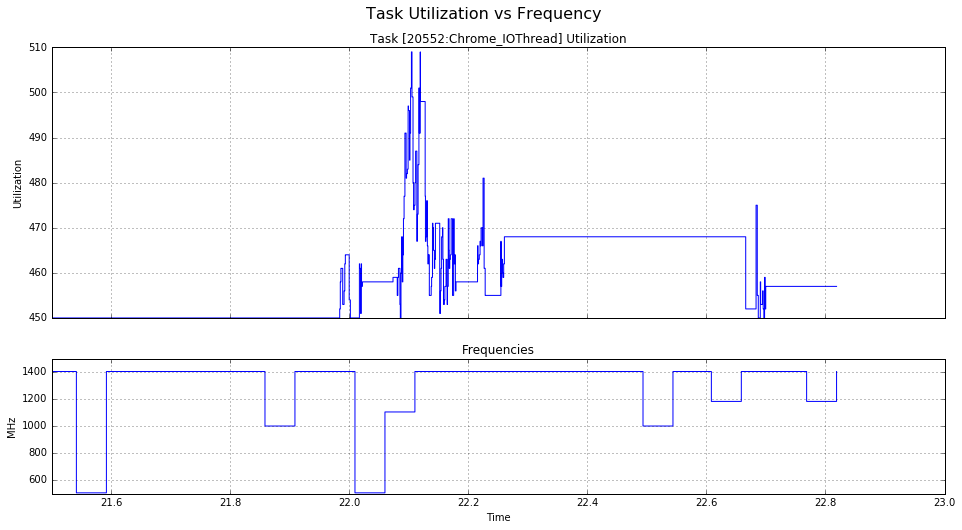

In [260]:
import matplotlib.gridspec as gridspec

t_min = 21.5
t_max = 23.0

gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]);

plt.figure(figsize=(16, 8));
plt.suptitle("Task Utilization vs Frequency",
             y=.97, fontsize=16, horizontalalignment='center');

# Plot Utilization
data = task_util_and_freq['util_avg']
axes = plt.subplot(gs[0,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Task [{}] Utilization'.format(task_name));
axes.set_ylabel('Utilization')
axes.set_xlim(t_min, t_max);
axes.grid(True);
axes.set_xticklabels([])
axes.set_xlabel('')


# Plot Frequencies
data = task_util_and_freq['frequency']/1000
axes = plt.subplot(gs[1,0]);
data.plot(ax=axes, drawstyle='steps-post');
axes.set_title('Frequencies');
axes.set_ylabel('MHz')
axes.set_xlim(t_min, t_max);
axes.grid(True);

Plots can be much better with just a little bit of setup and using the proper APIs.<br>
That's why **LISA** aims at providing a **predefined set of plot functions** for commonly used analysis.

## Using TRAPpy LinePlotter

In [306]:
# Consider the data frame for the frequency switching events
logging.info("Table for 'cpu_frequency' events:")
ftrace.cpu_frequency.data_frame.head(1)

08:01:48  INFO    : Table for 'cpu_frequency' events:


,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004


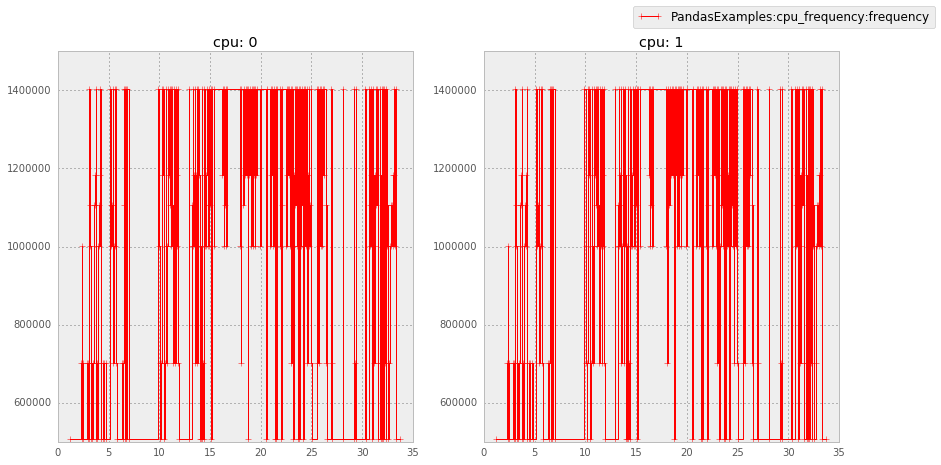

In [309]:
# It is possible to mix in the same plot multiple events

# The LinePlot module requires to specify a list of signals to plot.
# Each signal is defined as:
#       <event>:<column>
# where:
#  <event>   is one of the events collected from the trace by the FTrace object
#  <column>  is one of the column of the previously defined event
my_signals = [
    'cpu_frequency:frequency',
]

# These two paramatere are passed to the LinePlot call as long with the
# TRAPpy FTrace object
trappy.LinePlot(
    
    # FTrace object
    ftrace,
    
    # Signals to be plotted
    signals=my_signals,
    
    # Generate one plot for each value of the specified column
    pivot='cpu',
    
    # Generate only plots which satisfy these filters
    filters = {
        # Column
        # |     Values
        # |     |
        'cpu' : [0, 1]
    },
    
    # Formatting style
    drawstyle='steps-post',
    marker = '+'

).view()

## Using TRAPpy Interactive LinePlotter

In [298]:
# We can also produce interacive plots
trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'cpu_frequency:frequency'
    ],
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

trappy.ILinePlot(
    ftrace,                         # TRAPpy RUN object
    signals=[
      'sched_load_avg_task:util_avg'
    ],
    filters={
        'pid': [most_switching_pid]
    },
    drawstyle='steps-post',
    per_line=1,
#     sync_zoom=True,
#     group='UtilVsFrequency',
    marker = '+').view()

""
""


""
""


You can find much more exaples of plotting in TRAPpy on the example
notebook available on the GitHub:<br>
    https://github.com/ARM-software/trappy/blob/master/doc/Plotter.ipynb

## Data aggregation and analysis

In [274]:
df = ftrace.cpu_frequency.data_frame
df.head()

,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004
0.661136,kschedfreq:2,2,119,3,1807000,0.661136,0.051760
0.712896,kschedfreq:2,2,119,2,507000,0.712896,0.000009
0.712905,kschedfreq:2,2,119,3,507000,0.712905,0.473305
1.186210,sh,0,20289,0,507000,1.186210,0.000252


In [275]:
# Lets compute the residency on each OPP
df.loc[:,'start'] = df.index
df.loc[:,'delta'] = (df['start'] - df['start'].shift()).fillna(0).shift(-1)
df.head()

,__comm,__cpu,__pid,cpu,frequency,start,delta
Time,,,,,,,
0.661132,kschedfreq:2,2,119,2,1807000,0.661132,0.000004
0.661136,kschedfreq:2,2,119,3,1807000,0.661136,0.051760
0.712896,kschedfreq:2,2,119,2,507000,0.712896,0.000009
0.712905,kschedfreq:2,2,119,3,507000,0.712905,0.473305
1.186210,sh,0,20289,0,507000,1.186210,0.000252


In [276]:
import pandas as pd

# Now we can get group by frequency and sum the partional residency times
freq_residencies = df.groupby('frequency')['delta'].sum()
logging.info("Residency time per OPP:")
df = pd.DataFrame(freq_residencies)
df

07:37:46  INFO    : Residency time per OPP:


,delta
frequency,
507000,11.141186
702000,1.832051
1001000,2.810101
1105000,1.160819
1183000,1.321498
1209000,2.794528
1404000,9.991687
1612000,0.506026
1807000,2.727041


In [283]:
# Compute the relative residency time
tot = sum(freq_residencies)
#df = df.apply(lambda delta : 100*delta/tot)
for f in freq_residencies.index:
    logging.info("Freq %10dHz : %5.1f%%", f, 100*freq_residencies[f]/tot)

07:43:01  INFO    : Freq     507000Hz :  32.5%
07:43:01  INFO    : Freq     702000Hz :   5.3%
07:43:01  INFO    : Freq    1001000Hz :   8.2%
07:43:01  INFO    : Freq    1105000Hz :   3.4%
07:43:01  INFO    : Freq    1183000Hz :   3.9%
07:43:01  INFO    : Freq    1209000Hz :   8.2%
07:43:01  INFO    : Freq    1404000Hz :  29.1%
07:43:01  INFO    : Freq    1612000Hz :   1.5%
07:43:01  INFO    : Freq    1807000Hz :   8.0%


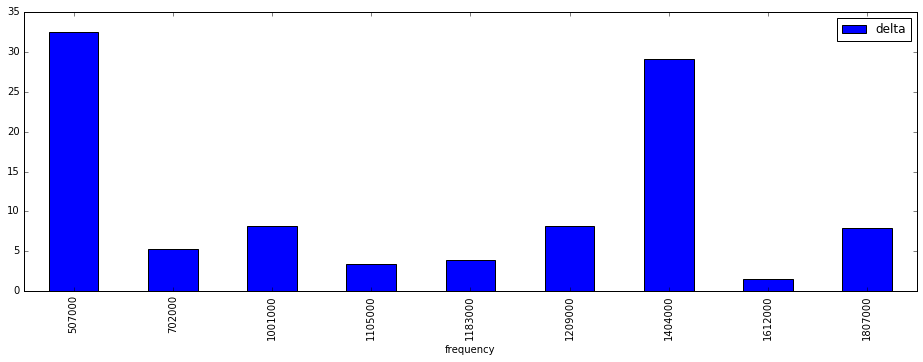

In [281]:
# Plot residency time
fig, axes = plt.subplots(1, 1, figsize=(16, 5));
df.plot(kind='bar', ax=axes)